# CSE 574: Introduction to Machine Learning Assignment - 1

#### Python tasks using dataset to analyze income inequality<br>

Submitted By:<br><br>
Name - Shivansh Gupta<br>
UBIT Name - sgupta67<br>
UB Person Number - 50604127<br>
UB Email ID - sgupta67@buffalo.edu


### 1) Importing Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

### 2) Uploding and understanding the structure of the data

Importing the CSV files

In [101]:
adult_data_df = pd.read_csv('dataset_adult/adult.data')

adult_data_df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [102]:
#as the first row is of no use so dropping it

adult_test_df = pd.read_csv('dataset_adult/adult.test', skiprows=1)

adult_test_df.head()

25     Private   226802           11th   7        Never-married  \
0  38     Private    89814        HS-grad   9   Married-civ-spouse   
1  28   Local-gov   336951     Assoc-acdm  12   Married-civ-spouse   
2  44     Private   160323   Some-college  10   Married-civ-spouse   
3  18           ?   103497   Some-college  10        Never-married   
4  34     Private   198693           10th   6        Never-married   

    Machine-op-inspct       Own-child   Black     Male     0   0.1   40  \
0     Farming-fishing         Husband   White     Male     0     0   50   
1     Protective-serv         Husband   White     Male     0     0   40   
2   Machine-op-inspct         Husband   Black     Male  7688     0   40   
3                   ?       Own-child   White   Female     0     0   30   
4       Other-service   Not-in-family   White     Male     0     0   30   

    United-States   <=50K.  
0   United-States   <=50K.  
1   United-States    >50K.  
2   United-States    >50K.  
3   United-States   <=50K.  
4   United-States   <=50K.

#Importing the non-CSV files through parsing for metadata

In [103]:
old_adult_names_df = []

with open('dataset_adult/old.adult.names', 'r') as file:
    for line in file:
        old_adult_names_df.append(line.strip())



adult_names_df = []

with open('dataset_adult/adult.names', 'r') as file:
    for line in file:
        adult_names_df.append(line.strip())

Undestanding the structure of the dataset

In [104]:
adult_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [105]:
adult_data_df.describe()

39         77516            13          2174             0  \
count  32560.000000  3.256000e+04  32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05     10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05      2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

                 40  
count  32560.000000  
mean      40.437469  
std       12.347618  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000

In [106]:
adult_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   25                  16280 non-null  int64 
 1    Private            16280 non-null  object
 2    226802             16280 non-null  int64 
 3    11th               16280 non-null  object
 4    7                  16280 non-null  int64 
 5    Never-married      16280 non-null  object
 6    Machine-op-inspct  16280 non-null  object
 7    Own-child          16280 non-null  object
 8    Black              16280 non-null  object
 9    Male               16280 non-null  object
 10   0                  16280 non-null  int64 
 11   0.1                16280 non-null  int64 
 12   40                 16280 non-null  int64 
 13   United-States      16280 non-null  object
 14   <=50K.             16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [107]:
adult_test_df.describe()

25        226802             7            0           0.1  \
count  16280.000000  1.628000e+04  16280.000000  16280.00000  16280.000000   
mean      38.768305  1.894334e+05     10.073096   1081.97156     87.904668   
std       13.849192  1.057177e+05      2.567511   7584.16416    403.117078   
min       17.000000  1.349200e+04      1.000000      0.00000      0.000000   
25%       28.000000  1.167162e+05      9.000000      0.00000      0.000000   
50%       37.000000  1.778295e+05     10.000000      0.00000      0.000000   
75%       48.000000  2.383840e+05     12.000000      0.00000      0.000000   
max       90.000000  1.490400e+06     16.000000  99999.00000   3770.000000   

                 40  
count  16280.000000  
mean      40.392260  
std       12.479715  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000

In [108]:
print('The number of observations in the train data: ', adult_data_df.shape)
print('The number of observations in the test data: ', adult_test_df.shape)

The number of observations in the train data:  (32560, 15)
The number of observations in the test data:  (16280, 15)


### 3) Undestanding & Cleaning of the dataset

<b>As both the tables are missing column header so we will add them through the provided metadata</b><br><br>
For train data

In [109]:
#columns as per the metadata

column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                  'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                  'capital-gain', 'capital-loss', 'hours-per-week', 
                  'native-country', 'income']

adult_data_df.columns = column_headers

adult_data_df.head()

age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [110]:
# updated info of the table
 
adult_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<br>For test data

In [111]:
adult_test_df.columns = column_headers

adult_test_df.head()

age   workclass  fnlwgt      education  education-num       marital-status  \
0   38     Private   89814        HS-grad              9   Married-civ-spouse   
1   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
2   44     Private  160323   Some-college             10   Married-civ-spouse   
3   18           ?  103497   Some-college             10        Never-married   
4   34     Private  198693           10th              6        Never-married   

           occupation    relationship    race      sex  capital-gain  \
0     Farming-fishing         Husband   White     Male             0   
1     Protective-serv         Husband   White     Male             0   
2   Machine-op-inspct         Husband   Black     Male          7688   
3                   ?       Own-child   White   Female             0   
4       Other-service   Not-in-family   White     Male             0   

   capital-loss  hours-per-week  native-country   income  
0             0              50   United-States   <=50K.  
1             0              40   United-States    >50K.  
2             0              40   United-States    >50K.  
3             0              30   United-States   <=50K.  
4             0              30   United-States   <=50K.

In [112]:
# updated info of the table

adult_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education-num   16280 non-null  int64 
 5   marital-status  16280 non-null  object
 6   occupation      16280 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital-gain    16280 non-null  int64 
 11  capital-loss    16280 non-null  int64 
 12  hours-per-week  16280 non-null  int64 
 13  native-country  16280 non-null  object
 14  income          16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Checking & dropping duplicate rows if any

In [113]:
no_duplicate_rows = adult_data_df.duplicated().sum()
print('No of duplicate rows are: ', no_duplicate_rows)

No of duplicate rows are:  24


In [114]:
adult_data_df = adult_data_df.drop_duplicates()

#updated shape of the table is
adult_data_df.shape

(32536, 15)

Seperating the category and numerical column to check the unique values of every columns

In [115]:
category_column = adult_data_df.select_dtypes(include=['object'])
numerical_column = adult_data_df.select_dtypes(exclude=['object'])

category_column

workclass    education       marital-status  \
0       Self-emp-not-inc    Bachelors   Married-civ-spouse   
1                Private      HS-grad             Divorced   
2                Private         11th   Married-civ-spouse   
3                Private    Bachelors   Married-civ-spouse   
4                Private      Masters   Married-civ-spouse   
...                  ...          ...                  ...   
32555            Private   Assoc-acdm   Married-civ-spouse   
32556            Private      HS-grad   Married-civ-spouse   
32557            Private      HS-grad              Widowed   
32558            Private      HS-grad        Never-married   
32559       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  native-country  \
0         Exec-managerial         Husband   White     Male   United-States   
1       Handlers-cleaners   Not-in-family   White     Male   United-States   
2       Handlers-cleaners         Husband   Black     Male   United-States   
3          Prof-specialty            Wife   Black   Female            Cuba   
4         Exec-managerial            Wife   White   Female   United-States   
...                   ...             ...     ...      ...             ...   
32555        Tech-support            Wife   White   Female   United-States   
32556   Machine-op-inspct         Husband   White     Male   United-States   
32557        Adm-clerical       Unmarried   White   Female   United-States   
32558        Adm-clerical       Own-child   White     Male   United-States   
32559     Exec-managerial            Wife   White   Female   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32536 rows x 9 columns]

Understanding the data points of every column for further cleaning

In [116]:
#checking null values in the numerical columns

num_null_count = adult_data_df.isnull().sum()
print(num_null_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [117]:
for i in category_column:
    print(f"{i.title()}")
    total_count = adult_data_df[i].value_counts()
    percent_count = total_count / adult_data_df.shape[0]
    temp_data = pd.concat([total_count,percent_count], keys = ['total_count', 'percent_count'], axis=1)
    print(temp_data)
    print('\n')

Workclass
                  total_count  percent_count
workclass                                   
Private                 22673       0.696859
Self-emp-not-inc         2540       0.078067
Local-gov                2093       0.064329
?                        1836       0.056430
State-gov                1297       0.039864
Self-emp-inc             1116       0.034300
Federal-gov               960       0.029506
Without-pay                14       0.000430
Never-worked                7       0.000215


Education
              total_count  percent_count
education                               
HS-grad             10494       0.322535
Some-college         7282       0.223814
Bachelors            5352       0.164495
Masters              1722       0.052926
Assoc-voc            1382       0.042476
11th                 1175       0.036114
Assoc-acdm           1067       0.032794
10th                  933       0.028676
7th-8th               645       0.019824
Prof-school           576       

<b>Data Review</b><br><br>
1. <b>`native-country`, `occupation`, `workclass` </b> contains unknown values which are represented by ?<br> <br>
2. In <b>`education`</b> 9th, 10th, 11th, 12th should come under `HS-grad` but it has mentioned separately. <br> <br>
3. In <b>`workclass`</b> Self-emp-not-inc, Self-emp-inc can be placed under category `self-employed` to decrease complexity, and Local-gov,State-gov,Federal-gov can be placed under `goverment-emloyees`
 

### 4) Data Exploration and Visualization

##### To check and visualize how many people have income > $50k or <= $50k

In [118]:
income_division = adult_data_df['income'].value_counts()

print('The number of people having income > $50k or <= $50k are:')
print(income_division)

The number of people having income > $50k or <= $50k are:
income
<=50K    24697
>50K      7839
Name: count, dtype: int64


In [119]:
#plotting a pie chart to show the division

income_pie = px.pie(adult_data_df, names='income', title='The number of people having income > $50k or <= $50k')
income_pie.show()

As per the above graph <b>`75.9%`</b> of the peopl have income <= $50k

##### Understanding the `Age` factor on the income of the people

In [120]:
mean_value = adult_data_df['age'].mean()
median_value = adult_data_df['age'].median()


age_hist = px.histogram(adult_data_df, x='age', color_discrete_sequence=['#1fb89b'], title='Age vs Count histogram')

age_hist.add_vline(x=mean_value, line_dash="dash", line_color="#FF5733", annotation_text="Mean", annotation_position="top right")
age_hist.add_vline(x=median_value, line_dash="dot", line_color="red", annotation_text="Median", annotation_position="top left")


age_hist.show()

In [121]:
print('precise median age for >50K income : ',adult_data_df[adult_data_df['income']==' >50K']['age'].median(), 'yrs')

precise median age for >50K income :  44.0 yrs


In [122]:
print('precise median age for <=50k income : ',adult_data_df[adult_data_df['income']==' <=50K']['age'].median(), 'yrs')

precise median age for <=50k income :  34.0 yrs


`MEDIAN` age for people earning <=$50K is around `35yrs`.<br><br>
`MEDIAN` age for people earing >$50K is around `45yrs`.

##### Understanding the `Workclass` factor on income of people

In [123]:
countplot_workclass = px.histogram(adult_data_df, x='workclass', 
                                   color='income', barmode='group')
countplot_workclass.show()

As we can see `without-pay` & `Never-worked` are highly insignificant so it won't be a big impact even if we drop them

##### Understanding the `Education` factor on income of people

In [124]:
Education_count_data = adult_data_df[['education','income']].value_counts().reset_index(name='Number of people')

Education_plot = px.bar(Education_count_data, x='education', y='Number of people', 
                        title='Bar graph showing trend of education', color='income', barmode='group',
                        color_discrete_map={' <=50K': '#e80950', ' >50K': '#09c3e8'})

Education_plot.show()

As we can see people with `HS-grad` are the most under the category of `<= $50k`, but people with `Bachelors` are more under the category of `> $50k`
<br><br>
Also, we see that `education-num` and `education` are just the same columns, so we can drop `education`. As Values aren't linear, but <b>categorical</b> for `education-num`.

In [125]:
adult_data_df.drop(['education'], axis = 1, inplace = True)
adult_data_df.head()

age          workclass  fnlwgt  education-num       marital-status  \
0   50   Self-emp-not-inc   83311             13   Married-civ-spouse   
1   38            Private  215646              9             Divorced   
2   53            Private  234721              7   Married-civ-spouse   
3   28            Private  338409             13   Married-civ-spouse   
4   37            Private  284582             14   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              13   United-States   <=50K  
1             0              40   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40            Cuba   <=50K  
4             0              40   United-States   <=50K

In [126]:
#from test data too

adult_test_df.drop(['education'], axis = 1, inplace = True)
adult_test_df.head()

age   workclass  fnlwgt  education-num       marital-status  \
0   38     Private   89814              9   Married-civ-spouse   
1   28   Local-gov  336951             12   Married-civ-spouse   
2   44     Private  160323             10   Married-civ-spouse   
3   18           ?  103497             10        Never-married   
4   34     Private  198693              6        Never-married   

           occupation    relationship    race      sex  capital-gain  \
0     Farming-fishing         Husband   White     Male             0   
1     Protective-serv         Husband   White     Male             0   
2   Machine-op-inspct         Husband   Black     Male          7688   
3                   ?       Own-child   White   Female             0   
4       Other-service   Not-in-family   White     Male             0   

   capital-loss  hours-per-week  native-country   income  
0             0              50   United-States   <=50K.  
1             0              40   United-States    >50K.  
2             0              40   United-States    >50K.  
3             0              30   United-States   <=50K.  
4             0              30   United-States   <=50K.

##### Understanding the `Occupation` factor on income of people 

In [127]:
occupation_pie_plot = px.pie(adult_data_df, 
                        names='occupation',
                        title='Occupation distribution in the Dataset',
                        height=600)
occupation_pie_plot.show()

occupation_bar_plot = px.histogram(adult_data_df, x='occupation', 
                                   color='income', barmode='group',
                                   title='Income v/s occupation distribution using bar graph')
occupation_bar_plot.show()

As per the above two graphs, people from `Prof-speciality` background covers the most area under the dataset, i.e.; `12.7%`.<br><br>

Also there are `5.66%` of the people whose occupation is <b>unknown</b>, so as a percentage we don't have a huge data loss

##### Understanding `sex` factor on income of people

In [128]:
sex_income_count = pd.DataFrame({'sex': adult_data_df['sex'], 'income': adult_data_df['income']})
data_temp = sex_income_count.income.groupby([sex_income_count.sex,  sex_income_count.income]).size().reset_index(name='Number of people')
print("Please find the income division as per the sex of the person below: \n")
print(data_temp)

Please find the income division as per the sex of the person below: 

       sex  income  Number of people
0   Female   <=50K              9583
1   Female    >50K              1179
2     Male   <=50K             15114
3     Male    >50K              6660


In [129]:
sex_pie = px.pie(adult_data_df, names='sex',
                 title='Gender Distribution')

sex_treemap = px.treemap(data_temp, path=['sex', 'income'], values='Number of people',
                         color='Number of people', color_continuous_scale='Blues',
                         title = 'Income Distribution on the basis of Gender of the person')
sex_treemap.update_traces(marker=dict(cornerradius=5), root_color="lightgray")

sex_pie.show()
sex_treemap.show()


As we can see that `male` are the more the higher participant in the count factor as compared to `females`.<br><br>
Also , we can see that more percentage of `male` has an income more than $50k than `females`.

##### Understanding the `native-country` factor on income of people

In [130]:
NC_data = adult_data_df[['native-country', 'income']].value_counts().reset_index(name='Number of people')

In [131]:
native_country_plot = px.bar(NC_data, x='native-country', y='Number of people',
                             title='Native Country Distribution using bar graph', height=500, 
                             log_y=True, color='income', barmode='group')
native_country_plot.show()

As we can see the majority of people are from `United States` and it is making the rest of the data <b>insignificant</b>

### 5) Preparing Data for Modeling

##### Adding target column `income` with 0/1 values for training

0 when INCOME <= $50K <br><br>
1 when INCOME > $50K

In [132]:
train_adult_df = adult_data_df

In [133]:
#for train data
train_adult_df.loc[train_adult_df['income'] == ' <=50K', 'income'] = 0
train_adult_df.loc[train_adult_df['income'] == ' >50K', 'income'] = 1

#for test data
test_df = adult_test_df
test_df.loc[test_df['income'] == ' <=50K.', 'income'] = 0
test_df.loc[test_df['income'] == ' >50K.', 'income'] = 1


Plotting a <b>Correlation matrix</b> to identify the relation between the columns

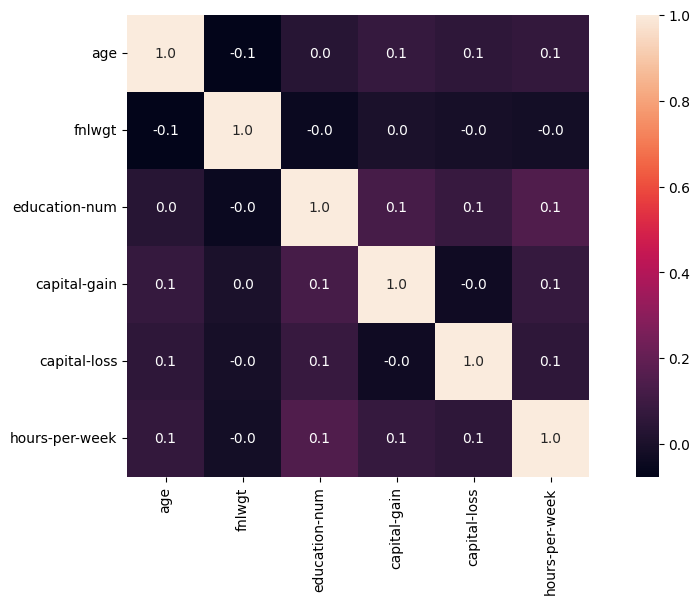

In [134]:
numeric_cols = train_adult_df.select_dtypes(include='int64')

corr = numeric_cols.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt=".1f", square=True)
plt.show()

In [135]:
#Dataset after all the changes

train_adult_df.head()

age          workclass  fnlwgt  education-num       marital-status  \
0   50   Self-emp-not-inc   83311             13   Married-civ-spouse   
1   38            Private  215646              9             Divorced   
2   53            Private  234721              7   Married-civ-spouse   
3   28            Private  338409             13   Married-civ-spouse   
4   37            Private  284582             14   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   capital-loss  hours-per-week  native-country income  
0             0              13   United-States      0  
1             0              40   United-States      0  
2             0              40   United-States      0  
3             0              40            Cuba      0  
4             0              40   United-States      0

##### Encoding columns for modeling

In [136]:
#importing required ML libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier

In [137]:
label_encoder = LabelEncoder()

columns_to_encode = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

#For Train model

for col in columns_to_encode:
    train_adult_df[col] = label_encoder.fit_transform(train_adult_df[col])

train_adult_df

age  workclass  fnlwgt  education-num  marital-status  occupation  \
0       50          6   83311             13               2           4   
1       38          4  215646              9               0           6   
2       53          4  234721              7               2           6   
3       28          4  338409             13               2          10   
4       37          4  284582             14               2           4   
...    ...        ...     ...            ...             ...         ...   
32555   27          4  257302             12               2          13   
32556   40          4  154374              9               2           7   
32557   58          4  151910              9               6           1   
32558   22          4  201490              9               4           1   
32559   52          5  287927              9               2           4   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0                 0     4    1             0             0              13   
1                 1     4    1             0             0              40   
2                 0     2    1             0             0              40   
3                 5     2    0             0             0              40   
4                 5     4    0             0             0              40   
...             ...   ...  ...           ...           ...             ...   
32555             5     4    0             0             0              38   
32556             0     4    1             0             0              40   
32557             4     4    0             0             0              40   
32558             3     4    1             0             0              20   
32559             5     4    0         15024             0              40   

       native-country income  
0                  39      0  
1                  39      0  
2                  39      0  
3                   5      0  
4                  39      0  
...               ...    ...  
32555              39      0  
32556              39      1  
32557              39      0  
32558              39      0  
32559              39      1  

[32536 rows x 14 columns]

In [138]:
#For test model

for col in columns_to_encode:
    test_df[col] = label_encoder.fit_transform(test_df[col])

test_df

age  workclass  fnlwgt  education-num  marital-status  occupation  \
0       38          4   89814              9               2           5   
1       28          2  336951             12               2          11   
2       44          4  160323             10               2           7   
3       18          0  103497             10               4           0   
4       34          4  198693              6               4           8   
...    ...        ...     ...            ...             ...         ...   
16275   39          4  215419             13               0          10   
16276   64          0  321403              9               6           0   
16277   38          4  374983             13               2          10   
16278   44          4   83891             13               0           1   
16279   35          5  182148             13               2           4   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0                 0     4    1             0             0              50   
1                 0     4    1             0             0              40   
2                 0     2    1          7688             0              40   
3                 3     4    0             0             0              30   
4                 1     4    1             0             0              30   
...             ...   ...  ...           ...           ...             ...   
16275             1     4    0             0             0              36   
16276             2     2    1             0             0              40   
16277             0     4    1             0             0              50   
16278             3     1    1          5455             0              40   
16279             0     4    1             0             0              60   

       native-country income  
0                  38      0  
1                  38      1  
2                  38      1  
3                  38      0  
4                  38      0  
...               ...    ...  
16275              38      0  
16276              38      0  
16277              38      0  
16278              38      0  
16279              38      1  

[16280 rows x 14 columns]

### 6) Applying multiple models to find the best fit

##### Preparing the dataset

In [139]:
X_train = train_adult_df.drop('income', axis=1) 
y_train = train_adult_df['income']

X_test = test_df.drop(['income'], axis=1)

y_test = test_df['income']

if y_train.dtype != 'category':
    y_train = y_train.astype('category')

if y_test.dtype != 'category':
    y_test = y_test.astype('category')

##### Using Random Forest

In [146]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=60)

rf_classifier.fit(X_train, y_train)
train_pred = rf_classifier.predict(X_train)
y_pred = rf_classifier.predict(X_test)

RF_train_accuracy = accuracy_score(y_train, train_pred)
RF_test_accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Train Accuracy: {RF_train_accuracy * 100:.2f}%")
print(f"Random Forest Test Accuracy: {RF_test_accuracy * 100:.2f}%")
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Random Forest Train Accuracy: 100.00%
Random Forest Test Accuracy: 85.64%

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12434
           1       0.74      0.60      0.66      3846

    accuracy                           0.86     16280
   macro avg       0.81      0.77      0.79     16280
weighted avg       0.85      0.86      0.85     16280



As we can see above, we recieved approximately <b>`85.64%`</b> accuracy using the <b>Random Forest Model</b>

In [169]:
conf_matrix = confusion_matrix(y_test, y_pred)

heatmap = go.Heatmap(z=conf_matrix, 
                     x=['Predicted 0', 'Predicted 1'],
                     y=['Actual 0', 'Actual 1'],
                     colorscale='Cividis', 
                     text=conf_matrix, texttemplate="%{text}")

layout = go.Layout(
    title='Confusion Matrix (AdaBoost)',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

##### Using AdaBoost Classifier (Decision Tree)

In [149]:
#Using ADA classifier

base_estimator = DecisionTreeClassifier(max_depth=7)
ada_classifier = AdaBoostClassifier(n_estimators=200, random_state=90)

ada_classifier.fit(X_train, y_train)

train_pred = ada_classifier.predict(X_train)
y_pred = ada_classifier.predict(X_test)

ada_train_accu = accuracy_score(y_train, train_pred)
ada_test_accu = accuracy_score(y_test, y_pred)

print(f"AdaBoost Train Accuracy Score: {ada_train_accu*100:.4f}%")
print(f"AdaBoost Test Accuracy Score: {ada_test_accu*100:.4f}%")
print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Classification Report")
print(classification_report(y_test, y_pred))

/Users/shivansh052k/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost Train Accuracy Score: 86.8976%
AdaBoost Test Accuracy Score: 86.6278%

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12434
           1       0.77      0.62      0.69      3846

    accuracy                           0.87     16280
   macro avg       0.83      0.78      0.80     16280
weighted avg       0.86      0.87      0.86     16280



As we can see above, we recieved approximately <b>`87%`</b> accuracy using the <b>AdaBoost Classifier</b> utilizing the <b>Decision tree</b> as the base learner.

In [150]:
conf_matrix = confusion_matrix(y_test, y_pred)

heatmap = go.Heatmap(z=conf_matrix, 
                     x=['Predicted 0', 'Predicted 1'], 
                     y=['Actual 0', 'Actual 1'], 
                     colorscale='reds', 
                     text=conf_matrix, texttemplate="%{text}")

layout = go.Layout(
    title='Confusion Matrix (AdaBoost)',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

##### Using CatBoost Classifier (Decision Tree)

In [168]:
cat_model = CatBoostClassifier(iterations=250, 
                               learning_rate=0.2,  
                               depth=7, 
                               eval_metric='Accuracy',
                               random_seed=200,
                               verbose=0) 

cat_model.fit(X_train, y_train)


train_pred = cat_model.predict(X_train)
y_pred = cat_model.predict(X_test)

cat_train_accuracy = accuracy_score(y_train, train_pred)
cat_test_accuracy = accuracy_score(y_test, y_pred)

print(f"CatBoost Train Accuracy Score: {cat_train_accuracy * 100:.2f}%")
print(f"CatBoost Test Accuracy Score: {cat_test_accuracy * 100:.2f}%")

print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")
print("Classification Report")
print(classification_report(y_test, y_pred))

CatBoost Train Accuracy Score: 90.93%
CatBoost Test Accuracy Score: 87.05%

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12434
           1       0.77      0.65      0.70      3846

    accuracy                           0.87     16280
   macro avg       0.83      0.79      0.81     16280
weighted avg       0.87      0.87      0.87     16280



As we can see above, we recieved precisely <b>`87.05%`</b> accuracy using the <b>CatBoost Classifier</b> utilizing the <b>Decision tree</b> as the base learner.

In [167]:
conf_matrix = confusion_matrix(y_test, y_pred)

heatmap = go.Heatmap(z=conf_matrix, 
                     x=['Predicted 0', 'Predicted 1'],
                     y=['Actual 0', 'Actual 1'],
                     colorscale='blues', 
                     text=conf_matrix, texttemplate="%{text}")

layout = go.Layout(
    title='Confusion Matrix (AdaBoost)',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

#### Comparing accuracies of multiple ML Models

In [166]:
models = ['Random Forest', 'AdaBoost','CatBoost']
accuracies = [RF_test_accuracy, ada_test_accu, cat_test_accuracy]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=models, 
    y=accuracies,
    marker_color='royalblue',
    text=[f'{acc*100:.2f}%' for acc in accuracies]
))

fig.update_layout(
    title='Accuracy of Multiple ML Models',
    xaxis_title='Model',
    yaxis_title='Accuracy (%)',
    yaxis_range=[0.85, 0.9],
    template='plotly_white'
)
